<a href="https://colab.research.google.com/github/alex-smith-uwec/CS491/blob/main/Visualizing%20Word2Vec%20Word%20Embeddings%20using%20t-SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 1. Visualizing Similar Words from Google News

In [1]:

##Be patient...this will take some time to download!
import gensim.downloader as api
model = api.load('word2vec-google-news-300')


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [2]:
import numpy as np
def linear_combination(word_scalars):
    """
    Perform a linear combination of word vectors.

    Parameters:
    - word_scalars (list of tuples): A list where each tuple contains a word (string) and a scalar (float or int).

    Returns:
    - np.array: The resulting vector from the linear combination.
    """
    # Initialize an empty vector for the result
    result_vector = np.zeros(model.vector_size)

    for word, scalar in word_scalars:
        # Check if the word is in the model
        if word in model:
            # Add (or subtract) the scaled vector to the result
            result_vector += model[word] * scalar
        else:
            print(f"Word '{word}' not in model vocabulary.")

    return result_vector



In [27]:
# Example usage:
# Compute the vector for the expression: woman - 2*man + 3*girl
combination_vector = linear_combination([('calculus', 1), ('hard', +2), ('biology', 1)])

# Find and print words most similar to the resulting vector
similar_words = model.most_similar(positive=[combination_vector], topn=10)
similar_words

[('hard', 0.6970796585083008),
 ('calculus', 0.680848240852356),
 ('biology', 0.6413543820381165),
 ('multivariable_calculus', 0.5858052968978882),
 ('algebra_trigonometry', 0.5514389276504517),
 ('algebra', 0.5361344218254089),
 ('calculus_physics', 0.535976767539978),
 ('calculus_trigonometry', 0.5353201031684875),
 ('precalculus', 0.5287297368049622),
 ('science', 0.528620719909668)]

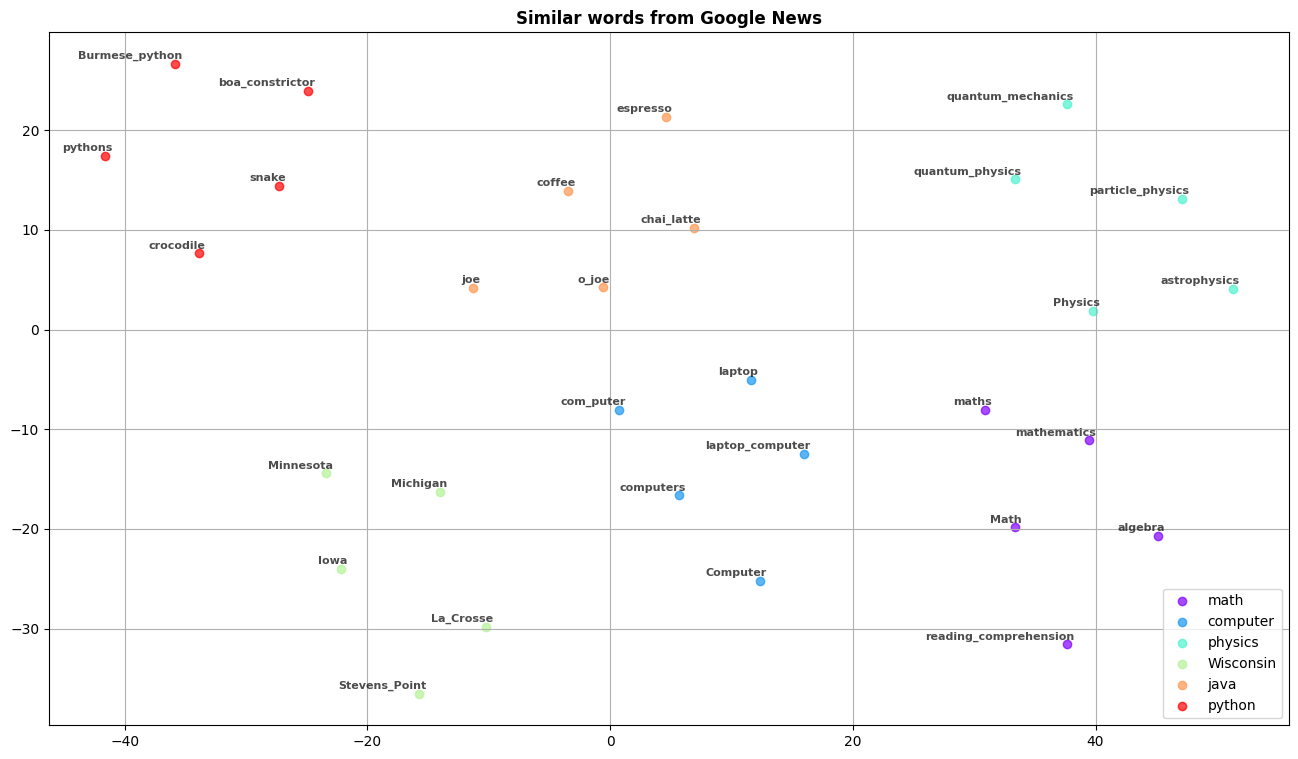

In [38]:
keys = ['math','computer', 'physics', 'Wisconsin', 'java','python']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=5):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, color=color, alpha=a, label=label)  # Changed from c=color to color=color
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.7, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom',
                         size=8, fontweight='bold')
    plt.legend(loc=4)
    plt.title(title, fontweight='bold')
    plt.grid(True)

    plt.show()

tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7)

## Visualizing Word2Vec Vectors from a novel in English

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
my_path="/content/drive/MyDrive/CS491/Data/"

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re
import gensim
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords if not already downloaded and convert to set for faster access
nltk.download('stopwords')
# stop_words = set(stopwords.words('english'))
stop_words=set()##do not remove stop words


# Modify the regular expression for non-alphanumeric characters removal to also remove newlines, carriage returns, and tabs
non_alpha_numeric_re = re.compile('[\n\r\t]|[^a-zA-Z0-9\s]+')

def preprocess_text(text):
    # Use the compiled regex to remove non-alphanumeric characters except for spaces, and also newlines, carriage returns, and tabs
    text = non_alpha_numeric_re.sub(' ', text)
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords using the set for faster lookup
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Return the preprocessed text
    return ' '.join(filtered_words).strip()

def prepare_for_w2v(filename_from, filename_to, lang='english', use_sentence_tokenization=True):
    with open(filename_from, "r", encoding='utf-8') as file:
        raw_text = file.read()
    with open(filename_to, 'w', encoding='utf-8') as f:
        # Check if sentence tokenization is used
        if use_sentence_tokenization:
            sentences = nltk.sent_tokenize(raw_text, language=lang)
        else:
            sentences = [raw_text]  # Treat the entire text as a single sentence

        for sentence in sentences:
            processed_sentence = preprocess_text(sentence.lower())
            print(processed_sentence, file=f)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def train_word2vec(filename):
    data = gensim.models.word2vec.LineSentence(filename)
    return Word2Vec(data, vector_size=300, window=5, min_count=1, workers=4)  # Adjusted workers to 4 for potential parallel processing improvement


In [ ]:
# Example usage with sentence tokenization
# prepare_for_w2v('path_to_your_input_file.txt', 'train_english_text.txt', 'english', use_sentence_tokenization=True)

# Example usage without sentence tokenization
prepare_for_w2v(my_path+'The Golden Bowl', 'train_english_text.txt', 'english', use_sentence_tokenization=False)

model = train_word2vec('train_english_text.txt')

In [ ]:
import numpy as np
from sklearn.manifold import TSNE

# Assuming model is your trained Word2Vec model from gensim

words_model = []
embeddings_model = []

for word in model.wv.key_to_index:
    embeddings_model.append(model.wv[word])
    words_model.append(word)

embeddings_model_np = np.array(embeddings_model)

# Initialize and apply TSNE
tsne_model_2d = TSNE(perplexity=64, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_model_2d_np = tsne_model_2d.fit_transform(embeddings_model_np)


In [ ]:
import csv

# Initialize empty lists to store the single words and most common words
single_words = []
most_common_words = []

# Open the file in read mode
with open(my_path+'novel_words_special.csv', 'r', newline='') as file:
    reader = csv.reader(file)

    # Iterate over each row in the csv
    for row in reader:
        # Add the word from the first column to single_words if it's not empty
        if row[0]:
            single_words.append(row[0])
        # Add the word from the second column to most_common_words if it's not empty
        if len(row) > 1 and row[1]:
            most_common_words.append(row[1])

# Now single_words and most_common_words contain the data from the csv



In [ ]:
most_common_words[0:5]

['would', 'Maggie', 'one', 'Charlotte', 'might']

In [ ]:
freq_words = [item.lower() for item in most_common_words]
print(len(freq_words))

hapax_words = [word.lower() for word in single_words]
len(hapax_words)

500


4494

In [ ]:
import matplotlib.pyplot as plt

def tsne_plot_2d(label, embeddings, words=[], a=0.1, freq_words=[], hapax_words=[]):
    plt.figure(figsize=(16, 9))

    # Extract x and y coordinates
    x = embeddings[:, 0]
    y = embeddings[:, 1]

    # Plot each point
    for i, word in enumerate(words):
        # Determine the color based on word type
        if word in freq_words:
            color = 'red'  # Frequent words in red
            alpha_value = 1.0  # Less transparent for frequent words
        elif word in hapax_words:
            color = 'green'  # Hapax legomena in green
            alpha_value = 1.0  # Less transparent for hapax legomena
        else:
            color = 'blue'  # Other words in background blue
            alpha_value = a  # Original transparency value for other words

        plt.scatter(x[i], y[i], color=color, alpha=alpha_value)

        ## To include words in plot, uncomment below
        # if word in freq_words or word in hapax_words:
        #     plt.annotate(word, alpha=1.0, xy=(x[i], y[i]), xytext=(5, 2),
        #                  textcoords='offset points', ha='right', va='bottom',
        #                  size=12, weight='bold')

    # Set the title of the plot with the given label
    plt.title(label, fontsize=20)

    plt.grid(True)
    plt.show()

    # Print the number of points
    num_points = embeddings.shape[0]
    print("Number of points plotted:", num_points)





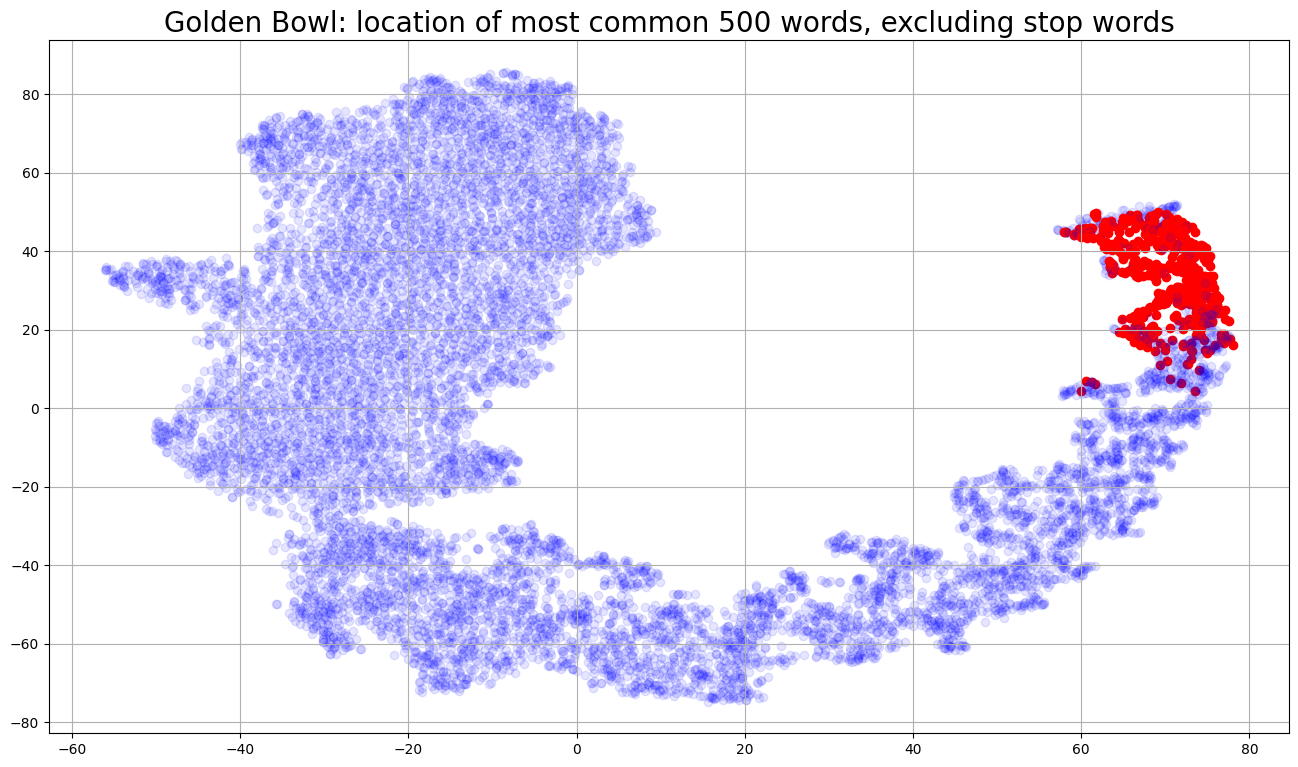

Number of points plotted: 10108


In [ ]:
# Example usage
# tsne_plot_2d('Golden Bowl', embeddings_model_2d_np, words_model, a=0.1, freq_words=freq_words, hapax_words=hapax_words)
##below plot just freq_words
tsne_plot_2d('Golden Bowl: location of most common 500 words, excluding stop words', embeddings_model_2d_np, words_model, a=0.1, freq_words=freq_words, hapax_words=[])

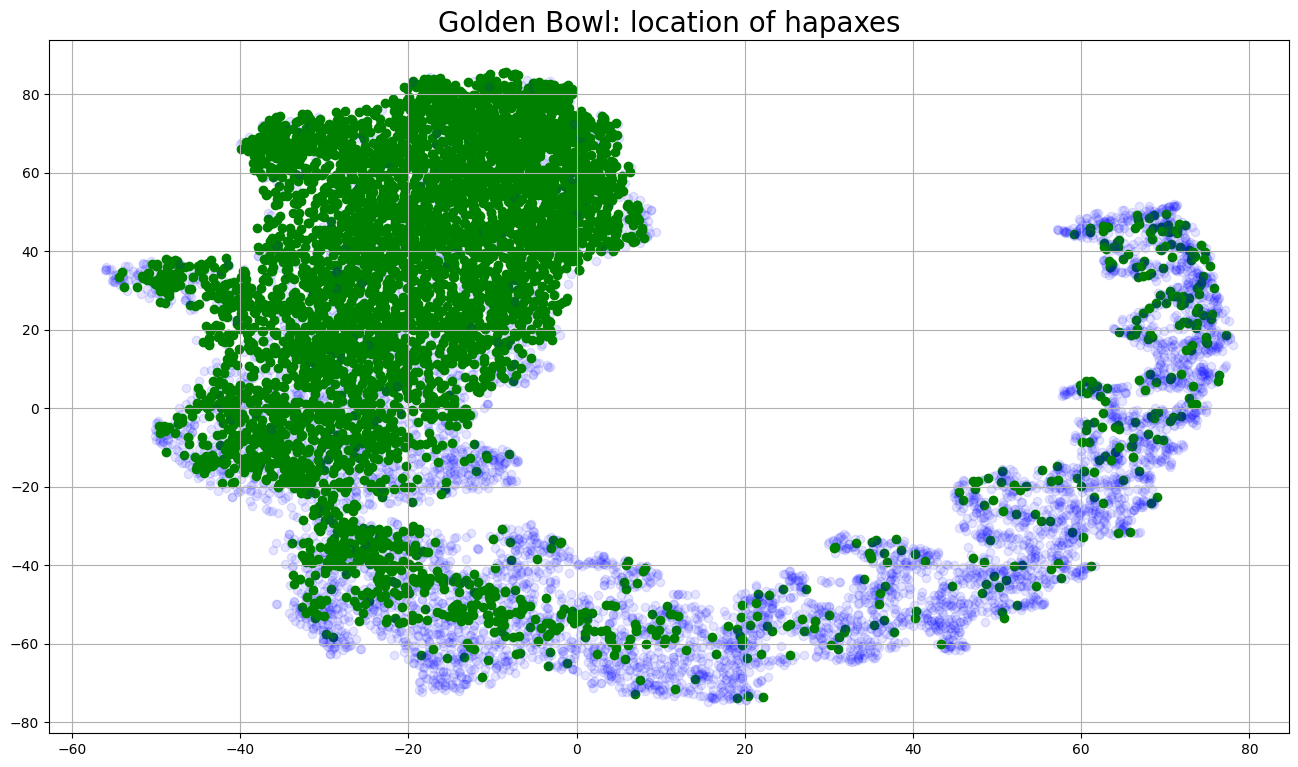

Number of points plotted: 10108


In [ ]:
##plot just hapax_words
tsne_plot_2d('Golden Bowl: location of hapaxes', embeddings_model_2d_np, words_model, a=0.1, freq_words=[], hapax_words=hapax_words)

In [ ]:
def find_words_in_grid(embeddings, words, x_min, x_max, y_min, y_max):
    """
    Finds and returns the words that are located within a specified grid area.

    Parameters:
    - embeddings: numpy array of shape (n, 2), where n is the number of points/words,
      containing the x and y coordinates of each word.
    - words: list of strings, containing the words corresponding to each point.
    - x_min, x_max, y_min, y_max: float, boundaries of the grid area.

    Returns:
    - list of words that are within the specified grid area.
    """
    # Extract x and y coordinates
    x = embeddings[:, 0]
    y = embeddings[:, 1]

    # Initialize an empty list to store words within the grid
    words_in_grid = []

    # Loop through each point and check if it falls within the specified grid area
    for i, word in enumerate(words):
        if x_min <= x[i] <= x_max and y_min <= y[i] <= y_max:
            words_in_grid.append(word)

    return words_in_grid

# Example usage (specify the grid boundaries as needed)
x_min, x_max = -40, -20  # Example boundaries
y_min, y_max = 45, 55  # Example boundaries
words_in_grid = find_words_in_grid(embeddings_model_2d_np, words_model, x_min, x_max, y_min, y_max)
print("Words in specified grid area:", words_in_grid)



Words in specified grid area: ['restless', 'proposing', 'wedding', 'earnestness', 'concealed', 'doubts', 'deciding', 'restored', 'backed', 'deserved', 'unexplained', 'drops', 'conclusive', 'comfortably', 'sublimely', 'declined', 'invitation', 'rush', 'refer', 'quoted', 'significant', 'distorted', 'practising', 'hurry', 'subdued', 'rebuke', 'greatness', 'chapter', 'predicament', 'choosing', 'disparity', 'blinded', 'convey', 'running', 'guesses', 'outlived', 'brightly', 'appraised', 'romans', 'accommodation', 'capture', 'recently', 'musingly', 'obscurely', 'reckoned', 'partner', 'ecstasy', 'primed', 'admiring', 'alacrity', 'atmosphere', 'default', 'awake', 'crime', 'cracked', 'encouraging', 'supposedly', 'infatuation', 'est', 'strongest', 'audacity', 'jumped', 'consummately', 'tells', 'drove', 'expecting', 'enter', 'reverted', 'nodded', 'annoyed', 'rules', 'estranged', 'mocking', 'proposition', 'behaving', 'abject', 'baby', 'existed', 'affinity', 'uniform', 'beheld', 'uncle', 'sister', '

In [ ]:
words_in_grid

['restless',
 'proposing',
 'wedding',
 'earnestness',
 'concealed',
 'doubts',
 'deciding',
 'restored',
 'backed',
 'deserved',
 'unexplained',
 'drops',
 'conclusive',
 'comfortably',
 'sublimely',
 'declined',
 'invitation',
 'rush',
 'refer',
 'quoted',
 'significant',
 'distorted',
 'practising',
 'hurry',
 'subdued',
 'rebuke',
 'greatness',
 'chapter',
 'predicament',
 'choosing',
 'disparity',
 'blinded',
 'convey',
 'running',
 'guesses',
 'outlived',
 'brightly',
 'appraised',
 'romans',
 'accommodation',
 'capture',
 'recently',
 'musingly',
 'obscurely',
 'reckoned',
 'partner',
 'ecstasy',
 'primed',
 'admiring',
 'alacrity',
 'atmosphere',
 'default',
 'awake',
 'crime',
 'cracked',
 'encouraging',
 'supposedly',
 'infatuation',
 'est',
 'strongest',
 'audacity',
 'jumped',
 'consummately',
 'tells',
 'drove',
 'expecting',
 'enter',
 'reverted',
 'nodded',
 'annoyed',
 'rules',
 'estranged',
 'mocking',
 'proposition',
 'behaving',
 'abject',
 'baby',
 'existed',
 'affi